In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import time
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error, f1_score, accuracy_score, classification_report, confusion_matrix, make_scorer, recall_score
from xgboost import XGBClassifier

In [52]:
X_nt = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_non_test_set.csv", index_col = 0)
X_t = pd.read_csv("C:\Aniruddh\Python\Jupyter\RCC\CSV FILES\Cleaned data\RCC_test_set.csv", index_col = 0)
y_nt = X_nt.pop("RECURRENCE")
y_t = X_t.pop("RECURRENCE")

In [53]:
X_t

,AGE,DM,HTN,CKD,INCIDENTAL,PAIN,HEMATURIA,MASS,LOW,FEVER,...,SEX_F,SEX_M,SITE_BL,SITE_LEFT,SITE_RIGHT,HISTOPATHOLOGY_CC,HISTOPATHOLOGY_PAP,APPROACH_1,APPROACH_2,APPROACH_3
437,62,0,1,0,1,0,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
442,52,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,1,0,0
420,60,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,0,1,0
105,40,0,1,1,1,0,0,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
46,38,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,20,0,0,0,0,1,0,0,0.0,0,...,0,1,0,1,0,1,0,0,1,0
656,43,0,0,0,0,0,1,0,0.0,0,...,0,1,0,0,1,1,0,0,1,0
130,32,0,0,0,1,0,0,0,0.0,0,...,1,0,0,1,0,1,0,1,0,0
145,29,0,0,0,0,1,0,0,0.0,0,...,1,0,0,0,1,1,0,0,0,1


In [3]:
# RECALL-------------------------------------------------------------------------------------------------------------------------------------------------

In [55]:
model1 = XGBClassifier(random_state = 42)
imputer1 = SimpleImputer(strategy = 'median')
pipeline1 = Pipeline([
    ('imputer', imputer1),
    ('model', model1)
])

In [57]:
def grid_searcher(param_grid, pipeline, scoring = 'aucpr', cv = 5, verbose = 1):
    tic = time.time()
    grid_search = GridSearchCV(estimator = pipeline, param_grid = param_grid, cv = cv, scoring = scoring, n_jobs = -1, verbose = verbose)
    grid_search.fit(X_nt, y_nt)
    best_params = grid_search.best_params_
    print("Best Hyperparameters:", best_params)
    best_model = grid_search.best_estimator_
    toc = time.time()
    print("Time Taken:", toc - tic)
    return best_params, best_model

In [58]:
def model_test(best_model):
    y_pred_test = best_model.predict(X_t)
    report_test = classification_report(y_t, y_pred_test)
    print("Classification Report on Test Set:")
    print(report_test)
    cm = confusion_matrix(y_t, y_pred_test)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       183
           1       0.44      0.15      0.23        26

    accuracy                           0.87       209
   macro avg       0.67      0.56      0.58       209
weighted avg       0.83      0.87      0.84       209



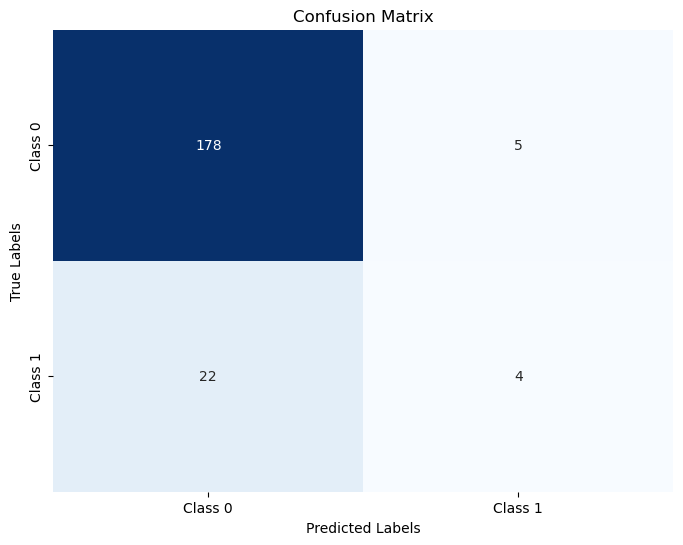

In [59]:
pipeline1.fit(X_nt, y_nt)
model_test(pipeline1)

In [60]:
param_grid1 = {
    'model__learning_rate': np.linspace(0.01, 0.2, 39),
    'model__n_estimators': [50, 75, 100, 125, 150],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [0, 0.5, 1, 1.5]
}

In [16]:
scorer = make_scorer(recall_score, greater_is_better = True)

Fitting 5 folds for each of 3120 candidates, totalling 15600 fits
Best Hyperparameters: {'model__learning_rate': 0.18500000000000003, 'model__max_depth': 4, 'model__n_estimators': 75, 'model__reg_lambda': 1.5}
Time Taken: 132.45864057540894
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       183
           1       0.42      0.19      0.26        26

    accuracy                           0.87       209
   macro avg       0.66      0.58      0.59       209
weighted avg       0.83      0.87      0.84       209



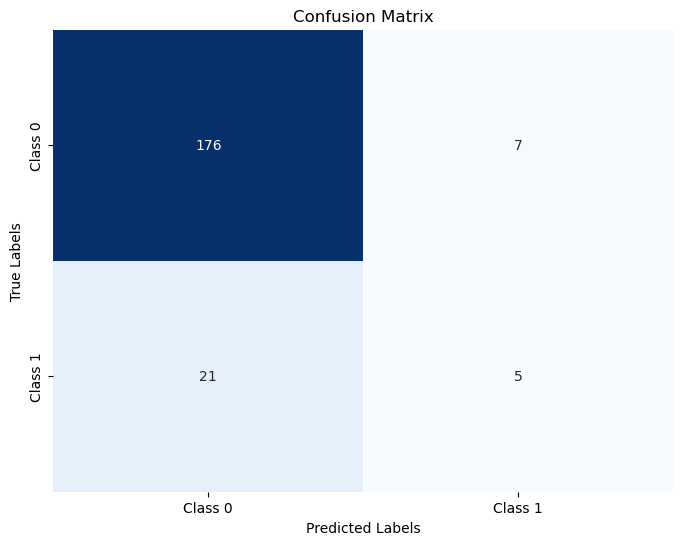

In [17]:
best_params1, best_model1 = grid_searcher(param_grid1, pipeline1, scorer)
model_test(best_model1)

In [24]:
np.linspace(0.15, 0.25, 21)

array([0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175, 0.18 , 0.185, 0.19 ,
       0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 , 0.225, 0.23 , 0.235,
       0.24 , 0.245, 0.25 ])

Fitting 5 folds for each of 1680 candidates, totalling 8400 fits
Best Hyperparameters: {'model__learning_rate': 0.185, 'model__max_depth': 4, 'model__n_estimators': 75, 'model__reg_lambda': 1.5}
Time Taken: 67.89181327819824
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       183
           1       0.42      0.19      0.26        26

    accuracy                           0.87       209
   macro avg       0.66      0.58      0.59       209
weighted avg       0.83      0.87      0.84       209



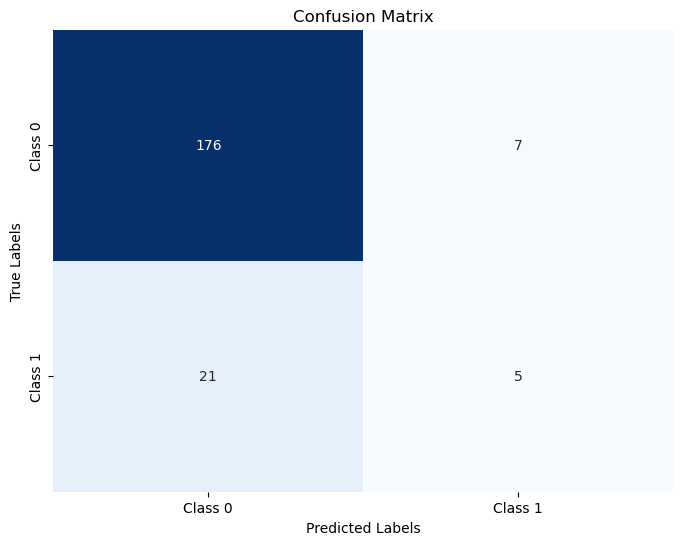

In [26]:
param_grid1a = {
    'model__learning_rate': np.linspace(0.15, 0.25, 21),
    'model__n_estimators': [55, 65, 75, 85, 95],
    'model__max_depth': [3, 4, 5, 6],
    'model__reg_lambda': [1, 1.5, 2, 2.5]
}
best_params1a, best_model1a = grid_searcher(param_grid1a, pipeline1, scorer)
model_test(best_model1a)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'model__colsample_bytree': 1.0, 'model__reg_alpha': 0, 'model__subsample': 1.0}
Time Taken: 1.1839492321014404
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       183
           1       0.42      0.19      0.26        26

    accuracy                           0.87       209
   macro avg       0.66      0.58      0.59       209
weighted avg       0.83      0.87      0.84       209



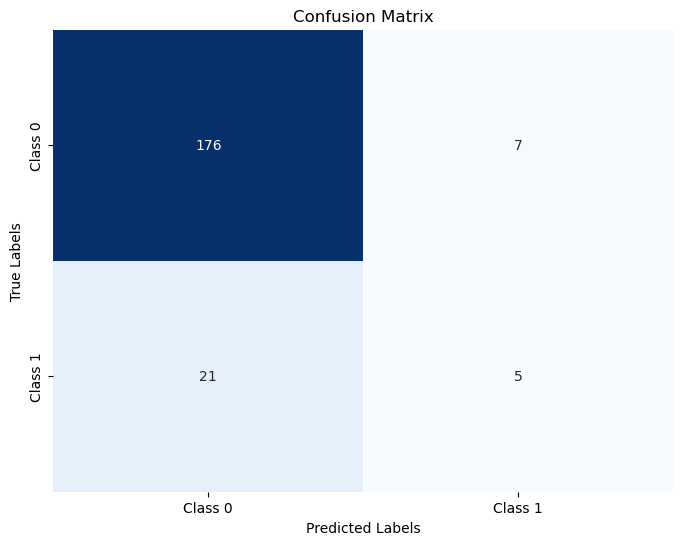

In [28]:
param_grid1a = {
    'model__subsample': [0.8, 0.9, 1.0],
    'model__colsample_bytree': [0.8, 0.9, 1.0],
    'model__reg_alpha': [0, 0.1, 0.5],
}
best_params1a, best_model1a = grid_searcher(param_grid1a, best_model1, scorer)
model_test(best_model1a)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 5, 'model__max_delta_step': 0, 'model__min_child_weight': 5, 'model__scale_pos_weight': 5}
Time Taken: 8.969958305358887
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       183
           1       0.32      0.62      0.42        26

    accuracy                           0.79       209
   macro avg       0.63      0.71      0.65       209
weighted avg       0.86      0.79      0.82       209



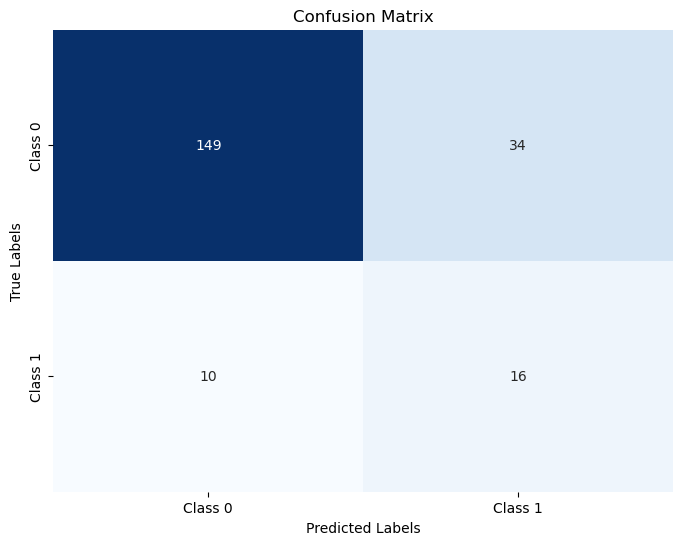

In [31]:
param_grid1b = {
    'model__min_child_weight': [1, 3, 5], # cover
    'model__gamma': [0, 1, 5],
    'model__scale_pos_weight': [1, 2, 5],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, scorer)
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 7, 'model__max_delta_step': 1, 'model__min_child_weight': 5, 'model__scale_pos_weight': 7}
Time Taken: 2.343186140060425
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       183
           1       0.26      0.65      0.37        26

    accuracy                           0.72       209
   macro avg       0.60      0.69      0.60       209
weighted avg       0.85      0.72      0.77       209



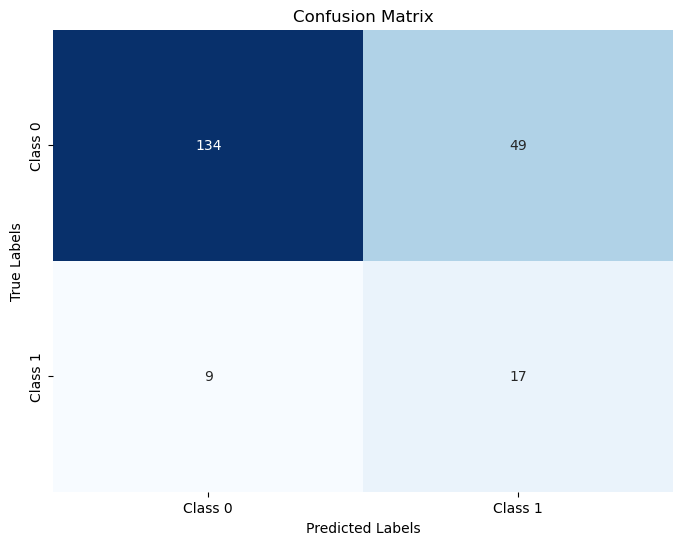

In [32]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [3, 5, 7],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, scorer)
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 7, 'model__max_delta_step': 1, 'model__min_child_weight': 3, 'model__scale_pos_weight': 5}
Time Taken: 2.382406711578369
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       183
           1       0.36      0.62      0.46        26

    accuracy                           0.82       209
   macro avg       0.65      0.73      0.67       209
weighted avg       0.87      0.82      0.84       209



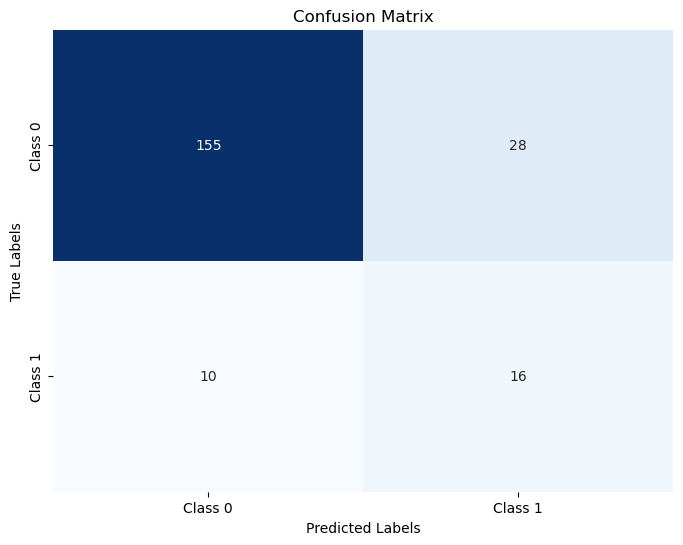

In [33]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [3, 5, 7],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'f1')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 9, 'model__max_delta_step': 1, 'model__min_child_weight': 5, 'model__scale_pos_weight': 5}
Time Taken: 2.2148375511169434
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       183
           1       0.37      0.62      0.46        26

    accuracy                           0.82       209
   macro avg       0.66      0.73      0.68       209
weighted avg       0.87      0.82      0.84       209



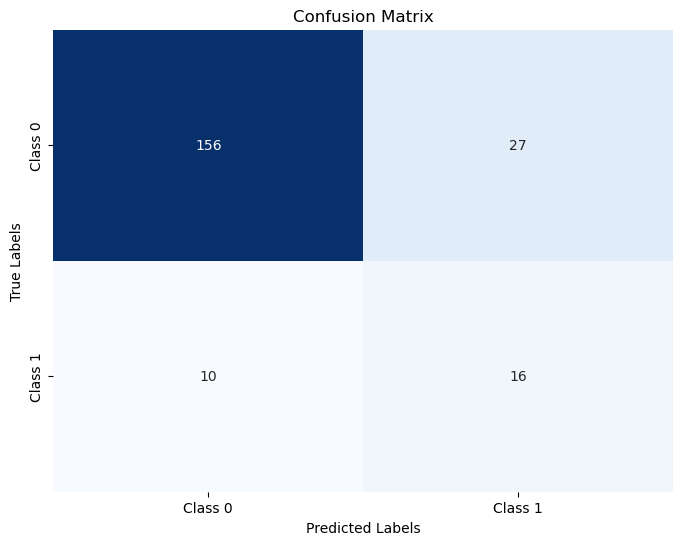

In [34]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [5, 7, 9],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'f1')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 11, 'model__max_delta_step': 0, 'model__min_child_weight': 5, 'model__scale_pos_weight': 3}
Time Taken: 2.3403642177581787
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       183
           1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209



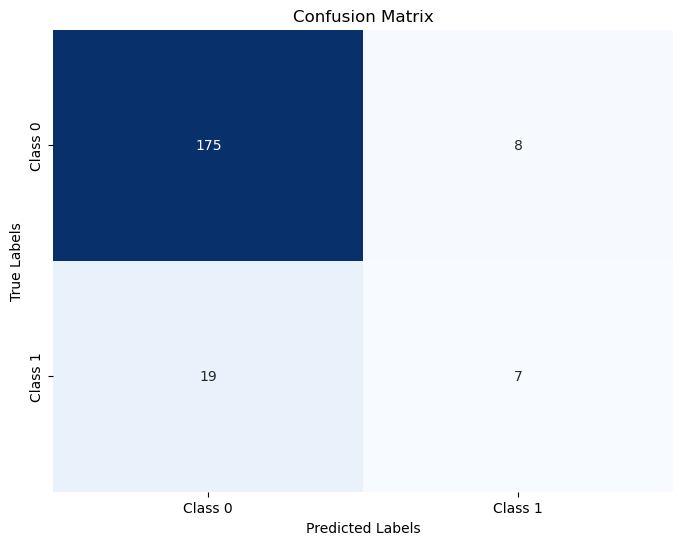

In [37]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [7, 9, 11],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'recall_weighted')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 11, 'model__max_delta_step': 0, 'model__min_child_weight': 5, 'model__scale_pos_weight': 3}
Time Taken: 2.291137933731079
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       183
           1       0.47      0.27      0.34        26

    accuracy                           0.87       209
   macro avg       0.68      0.61      0.63       209
weighted avg       0.85      0.87      0.86       209



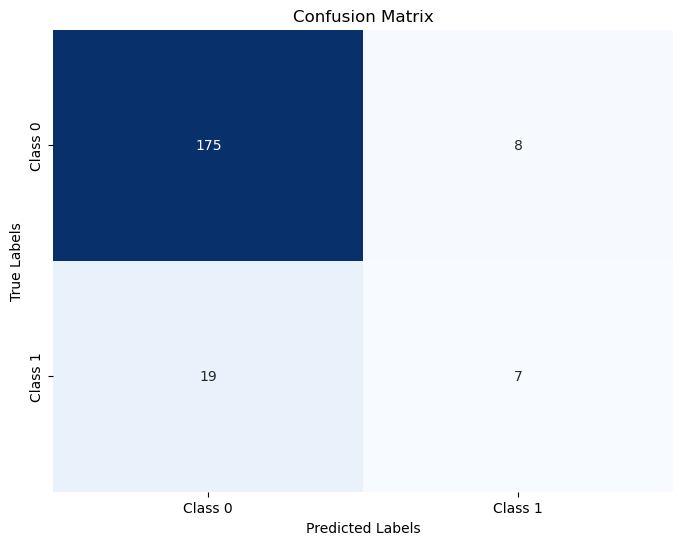

In [48]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [11, 13, 15],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'recall_weighted')
model_test(best_model1b)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'model__gamma': 11, 'model__max_delta_step': 1, 'model__min_child_weight': 3, 'model__scale_pos_weight': 5}
Time Taken: 2.9812917709350586
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       183
           1       0.36      0.62      0.46        26

    accuracy                           0.82       209
   macro avg       0.65      0.73      0.67       209
weighted avg       0.87      0.82      0.84       209



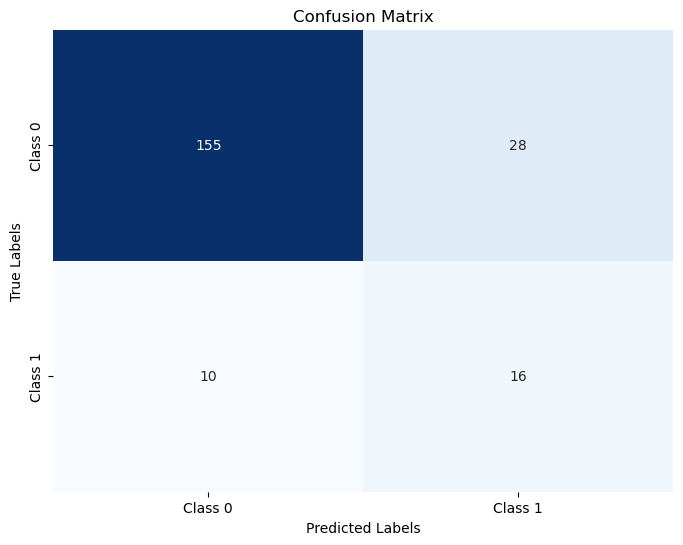

In [43]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [11, 13, 15],
    'model__scale_pos_weight': [1, 3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'f1')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 9, 'model__max_delta_step': 1, 'model__min_child_weight': 5, 'model__scale_pos_weight': 5}
Time Taken: 2.249234199523926
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89       183
           1       0.37      0.62      0.46        26

    accuracy                           0.82       209
   macro avg       0.66      0.73      0.68       209
weighted avg       0.87      0.82      0.84       209



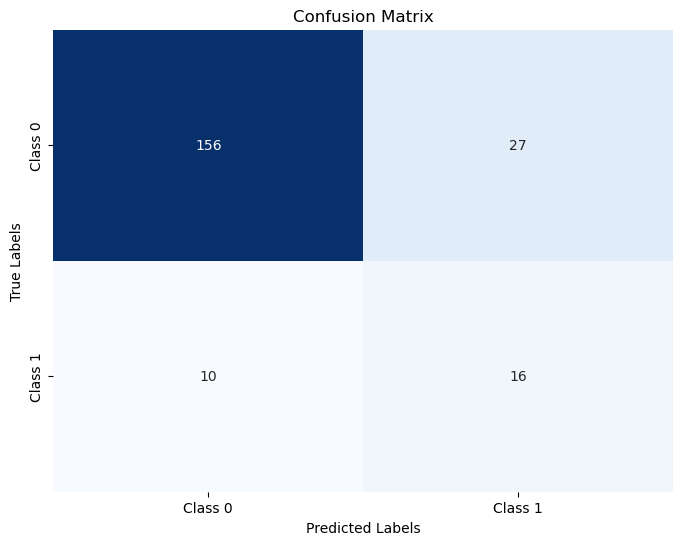

In [49]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [5, 7, 9],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'matthews_corrcoef')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 13, 'model__max_delta_step': 0, 'model__min_child_weight': 3, 'model__scale_pos_weight': 7}
Time Taken: 2.345531940460205
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       183
           1       0.24      0.65      0.35        26

    accuracy                           0.70       209
   macro avg       0.59      0.68      0.58       209
weighted avg       0.85      0.70      0.75       209



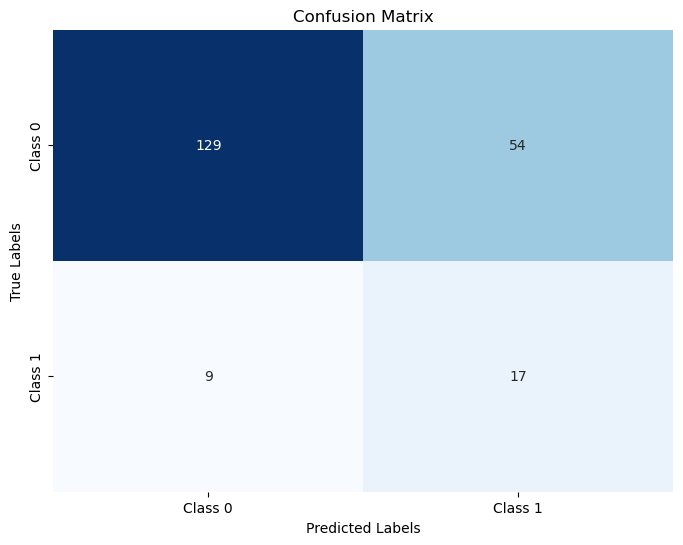

In [51]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [9, 11, 13],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'matthews_corrcoef')
model_test(best_model1b)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Hyperparameters: {'model__gamma': 7, 'model__max_delta_step': 1, 'model__min_child_weight': 5, 'model__scale_pos_weight': 7}
Time Taken: 2.23998761177063
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82       183
           1       0.26      0.65      0.37        26

    accuracy                           0.72       209
   macro avg       0.60      0.69      0.60       209
weighted avg       0.85      0.72      0.77       209



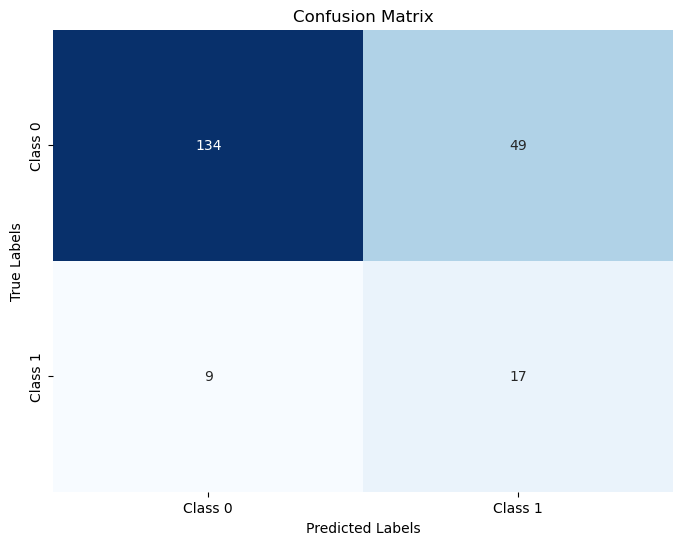

In [40]:
param_grid1b = {
    'model__min_child_weight': [3, 5, 7], # cover
    'model__gamma': [5, 7, 9],
    'model__scale_pos_weight': [3, 5, 7],
    'model__max_delta_step': [0, 1, 2]
}
best_params1b, best_model1b = grid_searcher(param_grid1b, best_model1a, 'recall_macro')
model_test(best_model1b)

In [30]:
best_params1bi, best_model1bi = grid_searcher(param_grid1b, best_model1a, 'aucpr')
model_test(best_model1bi)

InvalidParameterError: The 'scoring' parameter of GridSearchCV must be a str among {'recall_weighted', 'recall_micro', 'mutual_info_score', 'roc_auc', 'precision_weighted', 'recall_macro', 'recall_samples', 'neg_mean_absolute_percentage_error', 'explained_variance', 'precision_macro', 'precision', 'jaccard_micro', 'f1', 'precision_samples', 'completeness_score', 'fowlkes_mallows_score', 'neg_mean_gamma_deviance', 'normalized_mutual_info_score', 'roc_auc_ovr', 'neg_mean_squared_error', 'neg_log_loss', 'matthews_corrcoef', 'neg_root_mean_squared_error', 'roc_auc_ovr_weighted', 'neg_mean_poisson_deviance', 'top_k_accuracy', 'r2', 'average_precision', 'precision_micro', 'positive_likelihood_ratio', 'jaccard_samples', 'f1_micro', 'adjusted_rand_score', 'max_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'roc_auc_ovo_weighted', 'roc_auc_ovo', 'f1_weighted', 'v_measure_score', 'adjusted_mutual_info_score', 'neg_brier_score', 'accuracy', 'neg_mean_absolute_error', 'jaccard_weighted', 'jaccard_macro', 'f1_samples', 'neg_negative_likelihood_ratio', 'balanced_accuracy', 'rand_score', 'f1_macro', 'recall', 'jaccard', 'homogeneity_score'}, a callable, an instance of 'list', an instance of 'tuple', an instance of 'dict' or None. Got 'aucpr' instead.